In [1]:
# import initial dependencies
import pandas as pd
import requests
import json
from pprint import pprint
from api_key import omdb_key


In [2]:
# create a path to academy awards csv and read it into a pandas dataframe
awards_csv = "academy_awards_data_2.csv"
awards_df = pd.read_csv(awards_csv, usecols = ['Nominee', 'Year', 'Category', 'Won?'], encoding = 'latin-1')

# create another dataframe that only includes nominees in the Best Picture category
award_data = awards_df.loc[awards_df["Category"] == "Best Picture", :]

# create list of best picture nominees
best_picture_noms = award_data["Nominee"]

# print(best_picture_noms)
# print(best_picture_noms[77])
award_data.head()


,Year,Category,Nominee,Won?
75,2010 (83rd),Best Picture,Black Swan,NO
76,2010 (83rd),Best Picture,The Fighter,NO
77,2010 (83rd),Best Picture,Inception,NO
78,2010 (83rd),Best Picture,The Kids Are All Right,NO
79,2010 (83rd),Best Picture,The King's Speech,YES


In [ ]:
# NO NEED TO RUN THIS CELL AGAIN BECAUSE DATA IS ALREADY READ INTO CSV BELOW, 
# BUT TOTALLY FEEL FREE TO TEST IF YOU'VE INCLUDED ADDITIONAL/DIFFERENT AWARD CATEGORIES

# print the corresponding number for each movie  
movie_number = 1

# empty lists for holding movie data
box_office = []
genre = []
meta_score = []
imdb_rating = []
title = []
poster_url = []
rated = []
release_date = []
studio = []

best_picture_noms = award_data["Nominee"]
base_url = "http://www.omdbapi.com/?"

    
# print statement as each movie is processed
print(f"Beginning Data Retrieval")
print(f"==============================")

# loop through the movies in the best picture noms dataframe 
for movie in best_picture_noms:
    
    params = {
    "apikey" : omdb_key,
    "t" : movie
    } 
    
    # try statement for each potential movie
    try: 
        omdb_data_raw = requests.get(base_url, params=params)
        omdb_data = omdb_data_raw.json()
        box_office.append(omdb_data["BoxOffice"])
        genre.append(omdb_data["Genre"])
        meta_score.append(omdb_data["Metascore"])
        imdb_rating.append(omdb_data["imdbRating"])
        title.append(omdb_data["Title"])
        poster_url.append(omdb_data["Poster"])
        rated.append(omdb_data["Rated"]) 
        release_date.append(omdb_data["Released"]) 
        studio.append(omdb_data["Production"])
        print_title = omdb_data["Title"]
        
        print(f"Processing Record {movie_number} | {print_title}")
        print(omdb_data_raw.url) 
        
        # increase movie number by one each loop
        movie_number = movie_number + 1
        
#         to avoid 60 rpm api limit i'm waiting just over 1 second per loop
#         https://www.pythoncentral.io/pythons-time-sleep-pause-wait-sleep-stop-your-code/)
        time.sleep(1.01)
        
    # skip if no movie is found or if data is missing
    except:
        print("Data missing or movie not found. Skipping...")
    continue
    
print(f"==============================")
print(f"Data Retrieval Complete")
print(f"==============================")

In [ ]:
# NO NEED TO RUN THIS CELL AGAIN BECAUSE DATA IS ALREADY READ INTO CSV BELOW, 
# BUT TOTALLY FEEL FREE TO TEST IF YOU'VE INCLUDED ADDITIONAL/DIFFERENT AWARD CATEGORIES

# converting filtered api data into dataframe
filtered_omdb_data_df= pd.DataFrame ({
    "Title": title,
    "Genre": genre,
    "Meta_Score": meta_score,
    "imdb_Rating": imdb_rating,
    "Box_Office" : box_office,
    "Rated" : rated,
    "Studio" : studio,
    "Release_Date" : release_date,
    "Poster_URL" : poster_url
})

# coverting dataframe into csv-- this step isn't necessary, but did it so i'm not constantly dealing with the api directly
filtered_omdb_data_df.to_csv('filtered_omdb_data.csv', index=False)
filtered_omdb_data_df.head()

In [3]:
# created a path to the filted api csv and read it into a pandas dataframe
filtered_omdb_csv = "filtered_omdb_data.csv"
filtered_omdb_csv_df = pd.read_csv(filtered_omdb_csv)
# filtered_omdb_csv_df.count()
# award_data.count()

# merged the filtered api data csv and awards data csv into a single dataset
merged_movie_data_df = pd.merge(filtered_omdb_csv_df, award_data, left_on="Title", right_on="Nominee")
# merged_movie_data_df.to_csv('merged_movie_data.csv', index=False)
merged_movie_data_df.head()

,Title,Genre,Meta_Score,imdb_Rating,Box_Office,Rated,Studio,Release_Date,Poster_URL,Year,Category,Nominee,Won?
0,Black Swan,"Drama, Thriller",79.0,8.0,"$106,952,327",R,Fox Searchlight,17 Dec 2010,https://m.media-amazon.com/images/M/MV5BNzY2Nz...,2010 (83rd),Best Picture,Black Swan,NO
1,The Fighter,"Biography, Drama, Sport",79.0,7.8,"$93,571,803",R,Paramount Pictures,17 Dec 2010,https://m.media-amazon.com/images/M/MV5BMTM0OD...,2010 (83rd),Best Picture,The Fighter,NO
2,Inception,"Action, Adventure, Sci-Fi, Thriller",74.0,8.8,"$292,568,851",PG-13,Warner Bros. Pictures,16 Jul 2010,https://m.media-amazon.com/images/M/MV5BMjAxMz...,2010 (83rd),Best Picture,Inception,NO
3,The Kids Are All Right,"Comedy, Drama, Romance",86.0,7.0,"$20,803,237",R,Focus Features,30 Jul 2010,https://m.media-amazon.com/images/M/MV5BMjE4NT...,2010 (83rd),Best Picture,The Kids Are All Right,NO
4,The King's Speech,"Biography, Drama, History",88.0,8.0,"$138,300,000",R,The Weinstein Company,25 Dec 2010,https://m.media-amazon.com/images/M/MV5BMzU5Mj...,2010 (83rd),Best Picture,The King's Speech,YES


**POSSIBLE QUESTIONS + CHART OPTIONS (we obviously don't have to answer/chart all of these, just thought starters...):

1. Winning Nominees vs. Meta Score
    - Meta Score over time (line graph)
2. Winning Nominees vs. imdb Rating
    - imdb_Rating over time (line graph)
3. Winning Nominees vs. Rated
    - dot plot (???) ~kanye shrug~
4. Winning Nominees vs. Genre
    - dot plot (???) ~kanye shrug~
5. Winning Nominess vs. Studio
    - word cloud (!!!) <== this could be interesting to present, since we haven't gone over this in class
6. Avg. or Median Winning Nominees Box Office vs. Avg. or Median Losing Nominees Box Office
7. Some type of regression analysis predicting future winners by genre, rated, etc. (???)
8. Box Office vs. imdb Rating and/or Meta Score
9. Genre vs. imdb Rating and/or Meta Score
10. Rated vs. imdb Rating and/or Meta Score
11. Box Office vs. Genre
12. Box Office vs. Rated

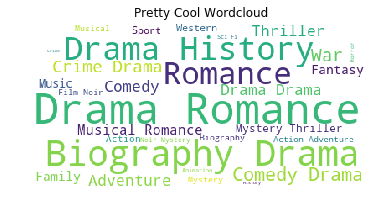

In [6]:
# import depencies for charts

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


# creating wordcloud (https://www.datacamp.com/community/tutorials/wordcloud-python)
word_cloud = WordCloud(max_font_size=75, max_words=100, background_color="white").generate(' '.join(merged_movie_data_df['Genre']))


# generate plot
plt.title("Pretty Cool Wordcloud")
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [16]:
#create dataframe for winning and losing nominees
winning_noms = merged_movie_data_df[merged_movie_data_df["Won?"] == "YES"]
# winning_noms

losing_noms = merged_movie_data_df[merged_movie_data_df["Won?"] == "NO"]
# losing_noms

#calculate average score/rating
avg_meta_score = merged_movie_data_df["Meta_Score"].mean()
print(avg_meta_score)

avg_imdb_rating = merged_movie_data_df["imdb_Rating"].mean()
print(avg_imdb_rating)

79.27099236641222
7.5532908704883255
463


In [20]:
rated_as_index = merged_movie_data_df.set_index('Rated').groupby(['Rated'])
rated_as_index.head()


#breakdown the count of each rating
rated_breakdown = rated_as_index['Title'].count()
print(rated_breakdown)



Rated
APPROVED      10
Approved      34
G             26
GP             2
M/PG           1
NOT RATED      9
Not Rated     80
PASSED        11
PG            79
PG-13         47
Passed        35
R            111
TV-MA          1
TV-PG          1
UNRATED        5
Unrated       11
Name: Title, dtype: int64


In [22]:
#create count of movie rating by winning and losing nominees 
rated_r = merged_movie_data_df.loc[merged_movie_data_df['Rated'] == 'R'].groupby('Won?')["Rated"].count()
rated_pg13 = merged_movie_data_df.loc[merged_movie_data_df['Rated'] == 'PG-13'].groupby('Won?')["Rated"].count()
rated_pg = merged_movie_data_df.loc[merged_movie_data_df['Rated'] == 'PG'].groupby('Won?')["Rated"].count()
rated_g= merged_movie_data_df.loc[merged_movie_data_df['Rated'] == 'G'].groupby('Won?')["Rated"].count()

rated_movies = pd.DataFrame({
        "Rated R": rated_r,
        "Rated PG-13": rated_pg13,
        "Rated PG": rated_pg,
        "Rated G": rated_g
})
rated_movies = rated_movies[['Rated R', 'Rated PG-13', 'Rated PG', 'Rated G']]
rated_movies.index.name = "Rated"

rated_movies.head()

,Rated R,Rated PG-13,Rated PG,Rated G
Rated,,,,
NO,89,38,67,20
YES,22,9,12,6
